<a href="https://colab.research.google.com/github/pydevcasts/MLHub/blob/master/Sequential_hard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
+import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
x = np.arange(-80, 81, 0.5)
y = x** 2 + 5 * x + 3

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42)
model_2=keras.Sequential()
model_2.add(keras.layers.Dense(units=256, activation="relu", input_shape=[1]))
model_2.add(keras.layers.Dense(units=256, activation="relu"))
model_2.add(keras.layers.Dense(units=256, activation="relu"))
model_2.add(keras.layers.Dense(units=256, activation="relu"))
model_2.add(keras.layers.Dense(units=1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
loss = keras.losses.MeanSquaredError
metric=tf.metrics.RootMeanSquaredError()
model_2.compile(optimizer=optimizer,loss=loss,metrics=[metric])
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,145 (774.00 KB)

 Trainable params: 198,145 (774.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience = 300, restore_best_weights=True)
hist=model_2.fit(x_train, y_train, epochs=1000, batch_size=128, callbacks=[early_stop],validation_data=(x_test, y_test))


Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 508779.5625 - root_mean_squared_error: 713.1527 - val_loss: 580233.0000 - val_root_mean_squared_error: 761.7303
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 515316.1250 - root_mean_squared_error: 717.8549 - val_loss: 582885.6875 - val_root_mean_squared_error: 763.4695
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 512022.0312 - root_mean_squared_error: 715.5562 - val_loss: 598216.8125 - val_root_mean_squared_error: 773.4448
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 514917.7812 - root_mean_squared_error: 717.5620 - val_loss: 595046.3125 - val_root_mean_squared_error: 771.3925
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 505261.8125 - root_mean_squared_error: 710.7889 - val_loss: 595059.5625 - val_root_mean_squared_error: 771.4011
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 492902.6250 - root_mean_squared_error: 701.7015 - val_loss: 594179.3125 - val_root_mea

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


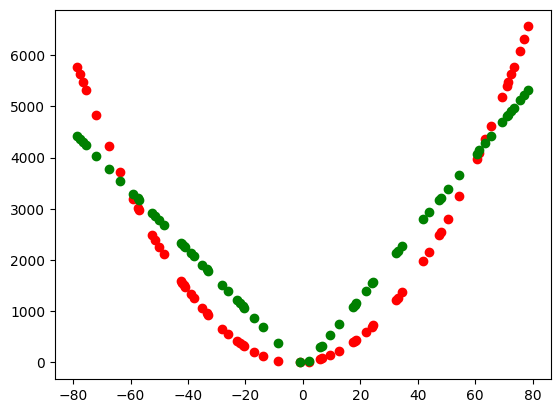

In [ ]:

y_pred_2 = model_2.predict(x_test)
plt.scatter(x_test,y_test, color="red")
plt.scatter(x_test, y_pred_2, color="green")

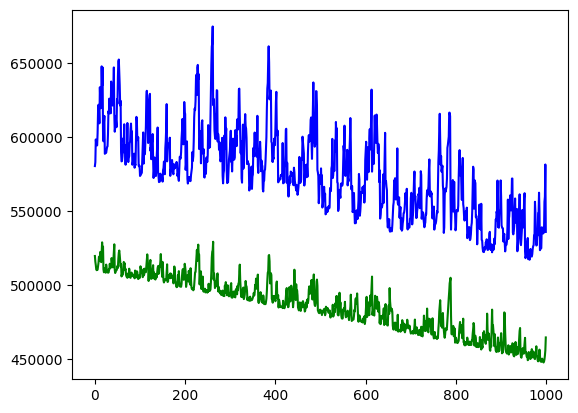

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(hist.history["val_loss"],color="blue")
plt.plot(hist.history["loss"], color="green")
plt.figure()
plt.show()